In [1]:
from nlp_preprocessing_functions import *

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


[nltk_data] Downloading package wordnet to /Users/sammy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sammy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# importing dataset

data = pd.read_csv('train.csv') 


# Reviewing the data shape, columns and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# EDA 

In [3]:
# Percentage of Data Missing Per Column Above 1%

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > .01][:152]

Total  Missing Percent
location   2533        33.272035
keyword      61         0.801261

In [4]:
# Checking for Duplicates 

data[data.duplicated(subset = "text")]

id              keyword        location  \
48       68               ablaze  Live On Webcam   
115     165           aftershock              US   
119     172           aftershock     Switzerland   
164     238  airplane%20accident             NaN   
624     898         bioterrorism             NaN   
...     ...                  ...             ...   
7600  10855                  NaN             NaN   
7607  10867                  NaN             NaN   
7609  10870                  NaN             NaN   
7610  10871                  NaN             NaN   
7611  10872                  NaN             NaN   

                                                   text  target  
48    Check these out: http://t.co/rOI2NSmEJJ http:/...       0  
115   320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...       0  
119   320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...       0  
164   Experts in France begin examining airplane deb...       1  
624                          To fight bioterrorism sir.       0  
...                                                 ...     ...  
7600  Evacuation order lifted for town of Roosevelt:...       1  
7607  #stormchase Violent Record Breaking EF-5 El Re...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  

[110 rows x 5 columns]

In [5]:
# Dropping duplicates because the same text is assigned to both target classes

data.drop_duplicates(subset = ['text'], inplace = True)

In [6]:
# Confirming the drop of the duplicates based of the text column 

data[data.duplicated(subset = "text")]

Empty DataFrame
Columns: [id, keyword, location, text, target]
Index: []

In [7]:
# Unique words
uniqueWords = list(set(' '.join(data['text']).lower().split(' ')))
count = len(uniqueWords)
print("Here is the total number of unique words: {} \n".format(count))

# Total Words
data['total_words'] = data["text"].apply(lambda x: len(str(x).split(" ")))
total_words = data['total_words'].sum()
print("Here is the total number of words: {} \n".format(total_words))

# Character Count
data['char_count'] = data["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
char_count = np.mean(data['char_count'])
print("Here is the average number of characters: {} \n".format(char_count))

# Sentence Count
data['sentence_count'] = data["text"].apply(lambda x: len(str(x).split(".")))
sentence_count = np.mean(data['sentence_count'])
print("Here is the average number of sentences: {} \n".format(sentence_count))

# Average Word Length in Tweet
data['avg_word_length'] = data['char_count'] / data['total_words']
avg_word_length = np.mean(data['avg_word_length'])
print("Here is the total average length of all tweets: {} \n".format(avg_word_length))

# Average Sentence Length 
data['avg_sentence_lenght'] = data['total_words'] / data['sentence_count']
avg_sentence_lenght = np.mean(data['avg_sentence_lenght'])
print("Here is the total average sentence length: {} \n".format(avg_sentence_lenght))

data.head()

Here is the total number of unique words: 28121 

Here is the total number of words: 111812 

Here is the average number of characters: 86.97827535652405 

Here is the average number of sentences: 2.53218712514994 

Here is the total average length of all tweets: 6.176289678341662 

Here is the total average sentence length: 7.676698961961192 



id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  total_words  char_count  sentence_count  avg_word_length  \
0       1           13          57               1         4.384615   
1       1            7          32               2         4.571429   
2       1           22         112               2         5.090909   
3       1            9          57               1         6.333333   
4       1           17          72               1         4.235294   

   avg_sentence_lenght  
0                 13.0  
1                  3.5  
2                 11.0  
3                  9.0  
4                 17.0

In [8]:
# Tokenizing our text Column for EDA and later cleaning

data['tokenized_text'] = data['text'].parallel_apply(lambda x: tweets_tokenizer(x))

In [9]:
# Checking the addition of the Tokenized Text Column

data.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  total_words  char_count  sentence_count  avg_word_length  \
0       1           13          57               1         4.384615   
1       1            7          32               2         4.571429   
2       1           22         112               2         5.090909   
3       1            9          57               1         6.333333   
4       1           17          72               1         4.235294   

   avg_sentence_lenght                                     tokenized_text  
0                 13.0  [Our, Deeds, are, the, Reason, of, this, #eart...  
1                  3.5   [Forest, fire, near, La, Ronge, Sask, ., Canada]  
2                 11.0  [All, residents, asked, to, ', shelter, in, pl...  
3                  9.0  [13,000, people, receive, #wildfires, evacuati...  
4                 17.0  [Just, got, sent, this, photo, from, Ruby, #Al...

In [10]:
# Identifing Top 25 common words, before cleaning the tweets

top_25_words = pd.Series(' '.join(data['text']).split()).value_counts()[:25]

print("Here is the top 25 common words, before cleaning: \n\n {} ".format(top_25_words))

# Identify the least 25 uncommon words, before cleaning the tweets

least_25_words = pd.Series(' '.join(data['text']).split()).value_counts()[-25:]

print(" \n\n Here is the least common 25 words, before cleaning: \n\n {} ".format(least_25_words))

Here is the top 25 common words, before cleaning: 

 the     2536
a       1810
to      1783
in      1724
of      1679
and     1279
I       1190
for      800
is       792
on       758
-        756
you      617
my       545
The      542
with     487
that     484
at       475
by       460
it       415
be       361
from     360
was      357
have     348
are      336
this     332
dtype: int64 
 

 Here is the least common 25 words, before cleaning: 

 SPSå¨                           1
http://t.co/gMoUl9zQ2Q          1
@worldnetdaily#Homosexuality    1
@bbctms!                        1
http://t.co/sQFp6Ecz0i          1
http://t.co/N6AhgfMUDt          1
KingÛªs                        1
http://t.co/UCAwg59ulJ          1
http://t.co/mNsy1QR7bq          1
@Angels                         1
hits.                           1
@burberryant                    1
Packs                           1
@Armageddon????                 1
awful...                        1
@Mirmanda11                     1
@Kris

In [11]:
# Dropping ID column by name

data = data.drop(['id'], axis = 1)

In [12]:
# Checking Removal of ID Column

data.head()

keyword location                                               text  target  \
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1   
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1   
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1   
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1   
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1   

   total_words  char_count  sentence_count  avg_word_length  \
0           13          57               1         4.384615   
1            7          32               2         4.571429   
2           22         112               2         5.090909   
3            9          57               1         6.333333   
4           17          72               1         4.235294   

   avg_sentence_lenght                                     tokenized_text  
0                 13.0  [Our, Deeds, are, the, Reason, of, this, #eart...  
1                  3.5   [Forest, fire, near, La, Ronge, Sask, ., Canada]  
2                 11.0  [All, residents, asked, to, ', shelter, in, pl...  
3                  9.0  [13,000, people, receive, #wildfires, evacuati...  
4                 17.0  [Just, got, sent, this, photo, from, Ruby, #Al...

In [13]:
# Analyzing Target Variable 

total_tweets = len(data['target'])

count_normal_tweets = sum(data['target'] == 0)
percentage_normal_tweets = round(((sum(data['target'] == 0)) / (total_tweets) * 100), 2)

count_diaster_tweets = sum(data['target'] == 1)
percentage_diaster_tweets = round(((sum(data['target'] == 1)) / (total_tweets) * 100), 2)

print("The total number of Tweets: {} \n".format(total_tweets))
print("The number of Normal Tweets {} v.s. Diaster Tweets {} \n".format(count_normal_tweets, count_diaster_tweets))
print("The percentage of Normal Tweets {} % v.s. Diaster Tweetss {} % \n".format(percentage_normal_tweets, percentage_diaster_tweets))

The total number of Tweets: 7503 

The number of Normal Tweets 4305 v.s. Diaster Tweets 3198 

The percentage of Normal Tweets 57.38 % v.s. Diaster Tweetss 42.62 % 



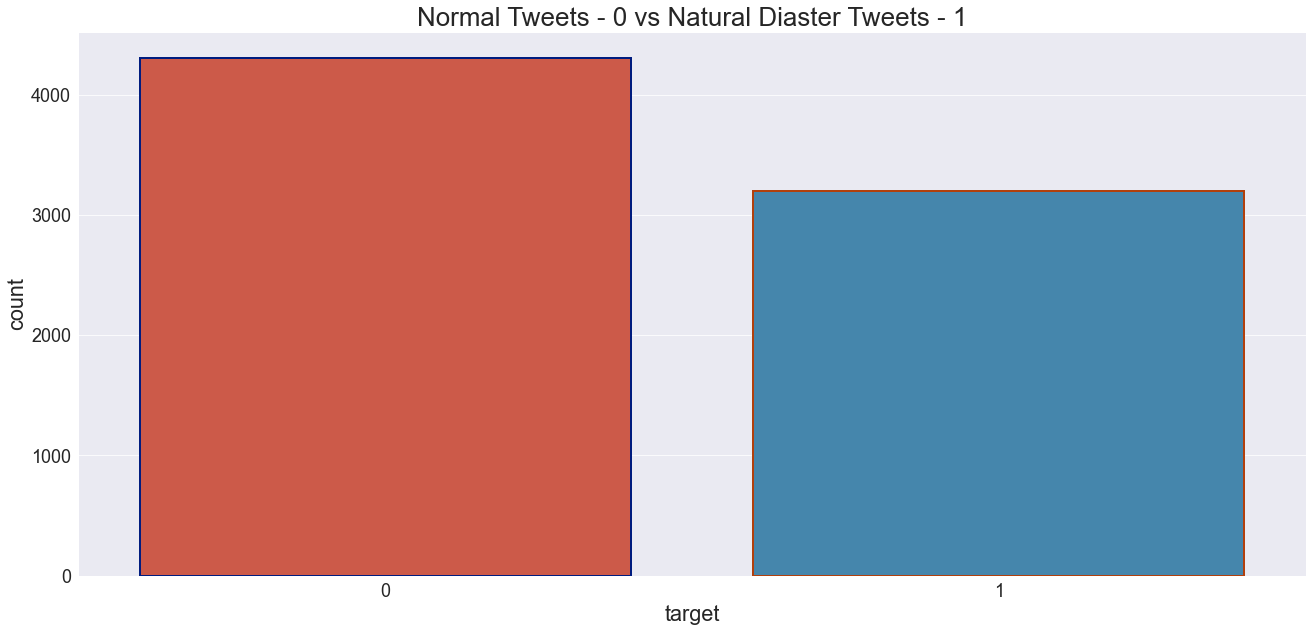

In [14]:
# A visual comparison of the two variables within our Target Column

fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.countplot(x = "target", 
                   data = data,
                   linewidth = 2,
                   edgecolor = sns.color_palette("dark", 24)).set_title("Normal Tweets - 0 vs Natural Diaster Tweets - 1")

In [15]:
# Looking at the Distribution of Total Words

fig = go.Figure()
fig.add_trace(go.Histogram(x = data['total_words'], 
                           name = "count", 
                           texttemplate = "%{x}", 
                           textfont_size = 20))
fig.show()

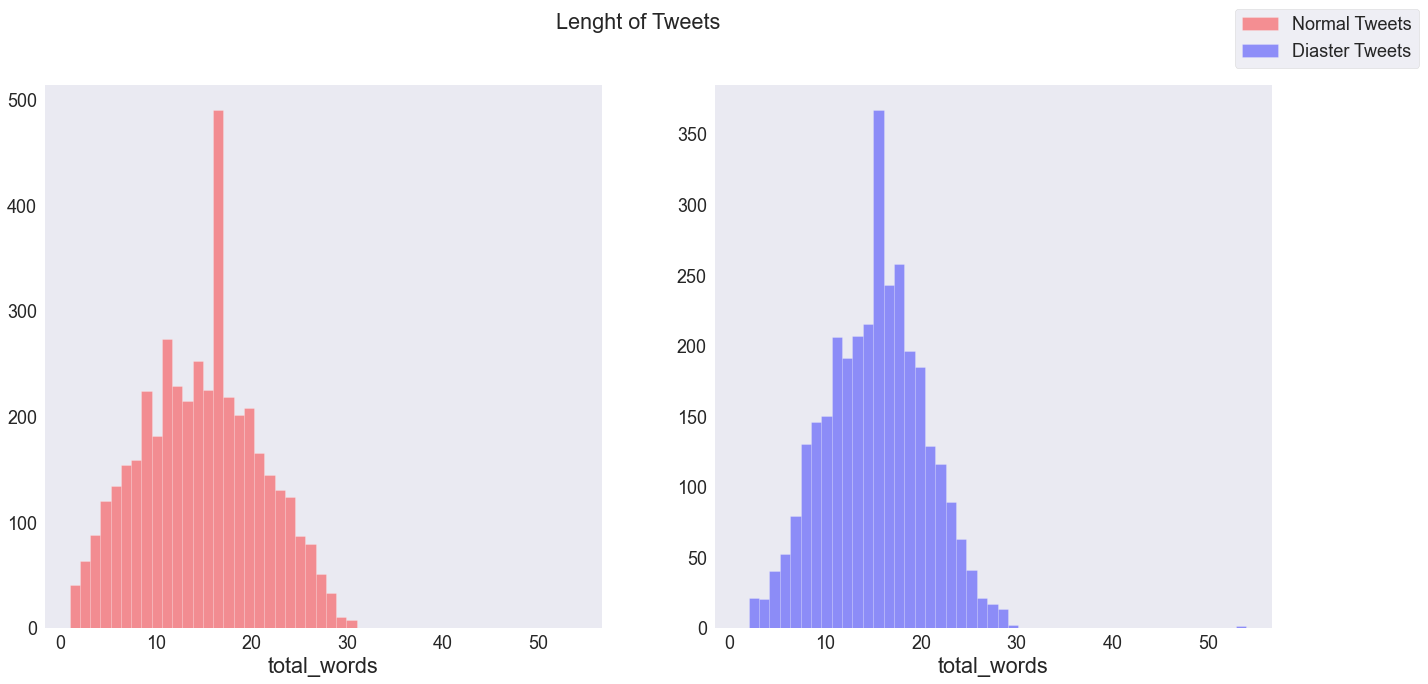

In [16]:
# Create visualization of the distribution of text length in comparision to target feature

fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)

sns.distplot(data[(data['target'] == 0)]['total_words'], 
             ax = ax1, 
             kde = False, 
             color = 'red',
             label = 'Normal Tweets')

sns.distplot(data[(data['target'] == 1)]['total_words'],
             ax = ax2, 
             kde = False, 
             color = 'blue',
             label = 'Diaster Tweets');

fig.suptitle('Lenght of Tweets')
fig.legend(loc = 'upper right')
ax1.grid()
ax2.grid()
plt.show();

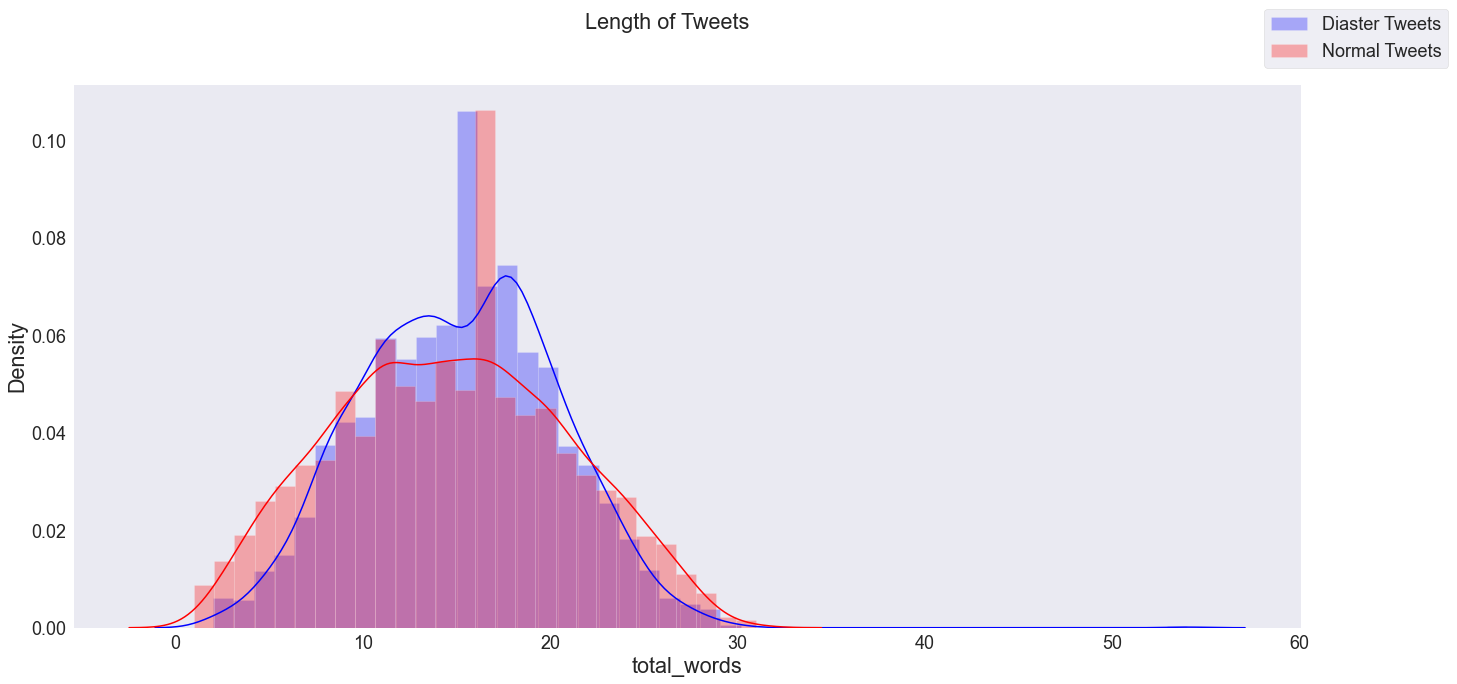

In [17]:
# Create visualization of the distribution of text length in comparision to target feature

fig, ax = plt.subplots()

sns.distplot(data[(data['target'] == 1)]['total_words'],
             ax = ax, 
             kde = True, 
             color = 'blue',
             label = 'Diaster Tweets',
             hist_kws = dict(alpha = .3))

sns.distplot(data[(data['target'] == 0)]['total_words'], 
             ax = ax, 
             kde = True, 
             color = 'red',
             label = 'Normal Tweets',
             hist_kws = dict(alpha = .3));

fig.suptitle('Length of Tweets')
fig.legend(loc = 'upper right')
ax.grid()
plt.show();

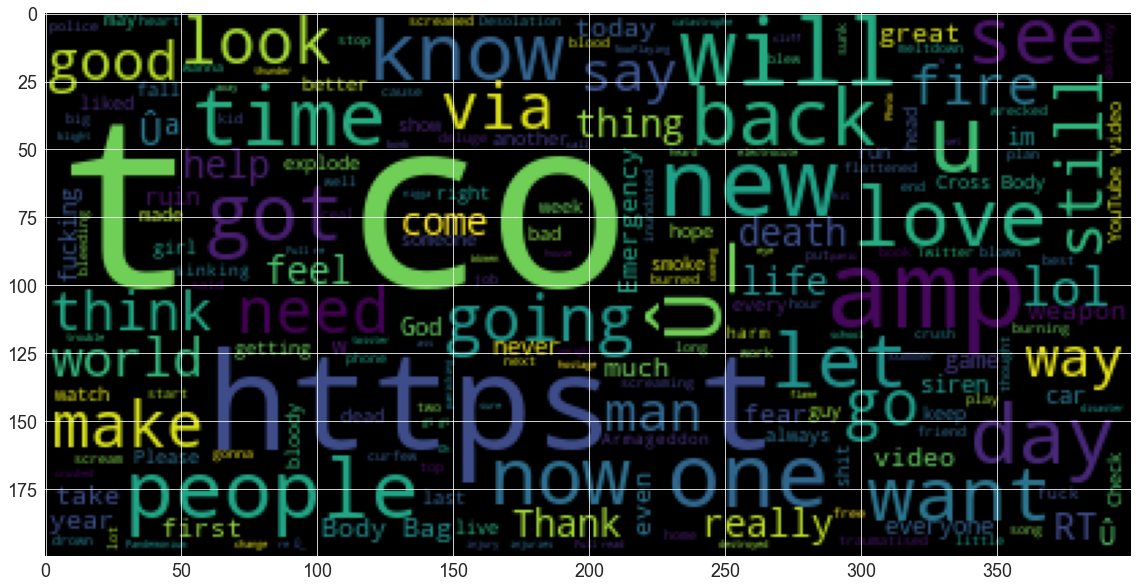

In [18]:
normal_tweet_text = (data[(data['target'] == 0)]['text']).tolist()

normal_tweet_text_as_one_string = ' '.join(normal_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(normal_tweet_text_as_one_string));

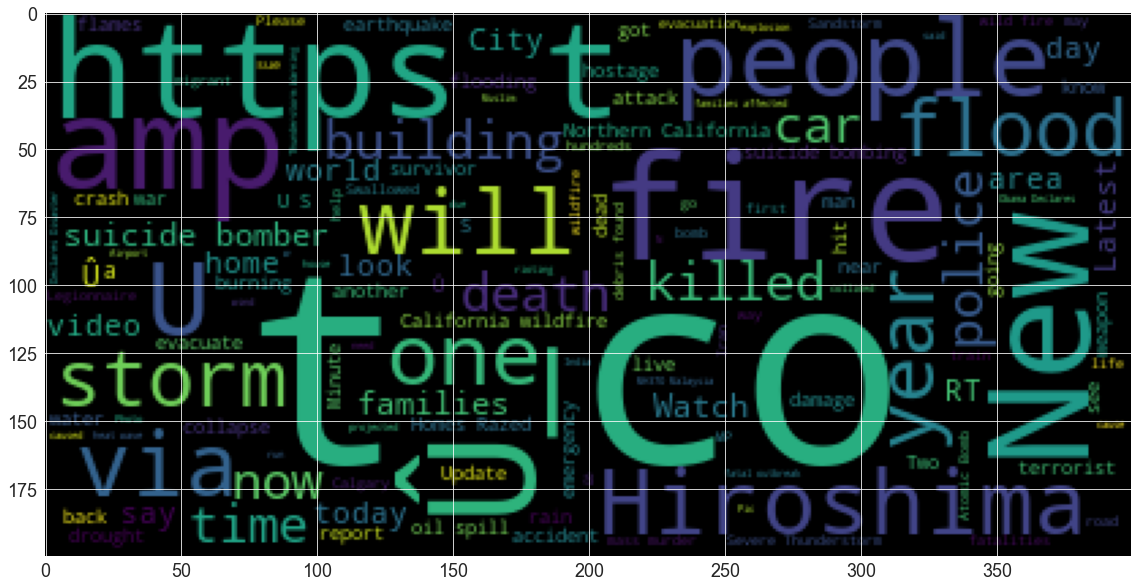

In [19]:
diaster_tweet_text = (data[(data['target'] == 1)]['text']).tolist()

diaster_tweet_text_as_one_string = ' '.join(diaster_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(diaster_tweet_text_as_one_string));

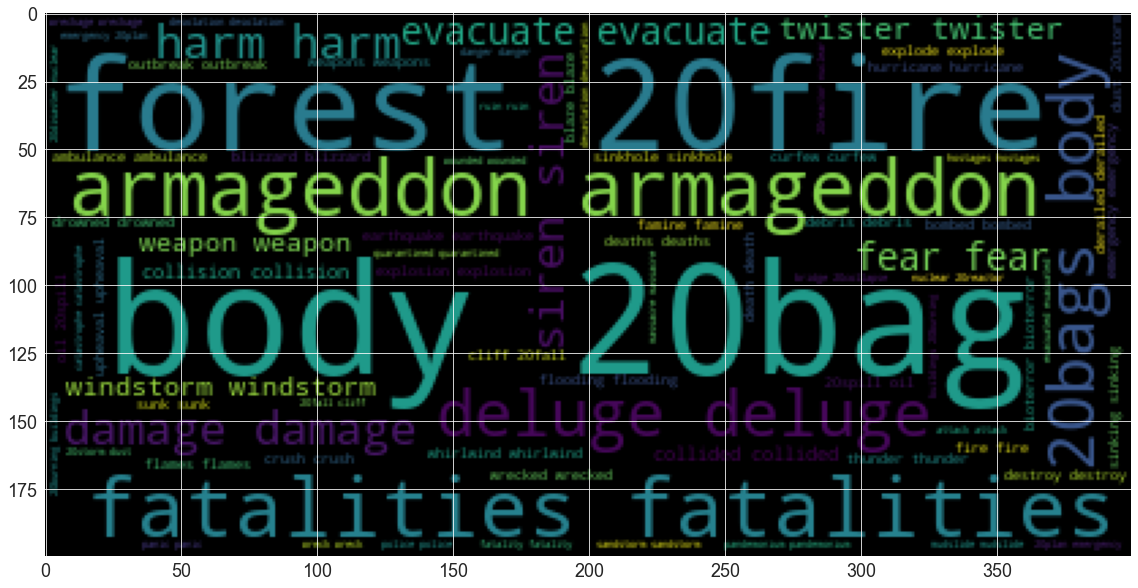

In [20]:
keyword = data['keyword'].dropna()
keyword_tweet_text = keyword.tolist()
keyword_tweet_text_as_one_string = ' '.join(keyword_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(keyword_tweet_text_as_one_string));

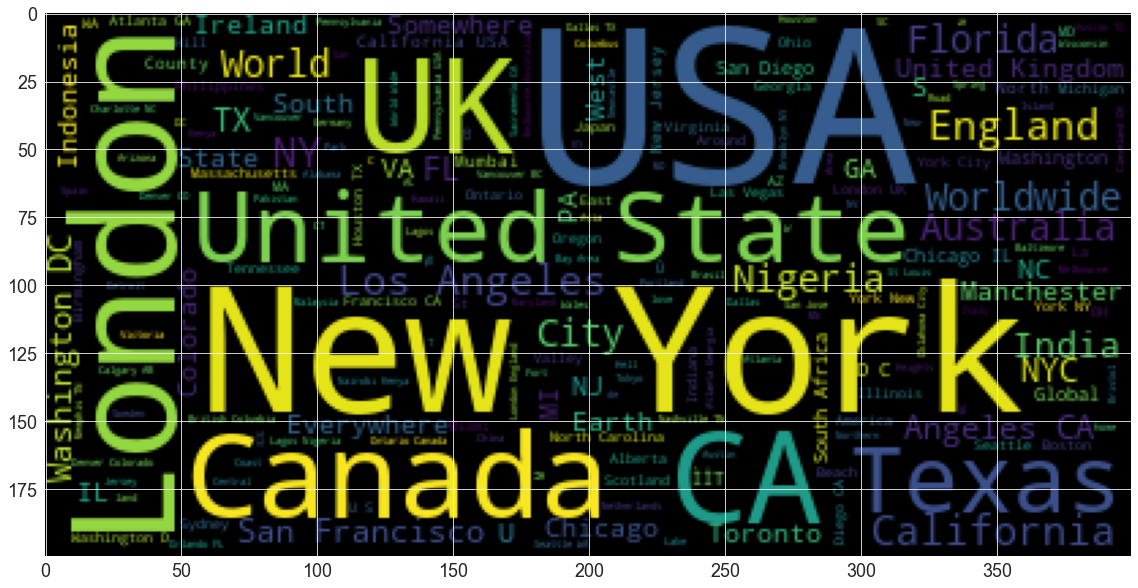

In [21]:
location = data['location'].dropna()
location_tweet_text = location.tolist()
location_tweet_text_as_one_string = ' '.join(location_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(location_tweet_text_as_one_string));

# Cleaning

In [22]:
# Using the NLP Preprocessing Functions from the Py File for Cleaning

In [23]:
sample = data.text[100]

In [24]:
sample

'.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad'

In [25]:
text_preprocesser_nlp(sample)

'police previously die road accident kill explosion'

In [26]:
# Converting emojis to text

data['clean_text'] = data['text'].apply(emoji.demojize)

In [27]:
# Cleaning the entire text column for the train  dataset

data['clean_text'] = data.clean_text.parallel_apply(lambda clean_text: text_preprocesser_nlp(clean_text))

In [28]:
# Reviewing Random Sample of Clean Text Column

data.clean_text.sample(frac = .3)

6864    tell oppress group people react trauma stupid ...
398     relax micro latimer arson suspect link fire ca...
5788       plenty black people riot toss win championship
3702    know man fear strong minded woman keeper get k...
242                         funny bristol annihilate ball
                              ...                        
5152    peoples republic china proc abandon west phili...
2696           detonation realistic asset enter india khz
491     christian attack muslims temple mount wave isr...
6147         add video playlist siren gameplaywalkthrough
7028    obama declare disaster typhoon devastate saipa...
Name: clean_text, Length: 2251, dtype: object

In [29]:
# Removing low occurrence words (Word count of less than 5)

freq = pd.Series(' '.join(data['clean_text']).split()).value_counts()
low_freq = list(freq.loc[freq < 5].index)
data['clean_text'] = data['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

In [30]:
# Reviewing a Random Sample of the Dataframe text column

data.sample(frac = .2)

keyword              location  \
2187              debris             Hong Kong   
3816  first%20responders  Victoria, BC  Canada   
6605           terrorism                   NaN   
601            bioterror    Melbourne, Florida   
3803        fire%20truck                 LA ??   
...                  ...                   ...   
6915             trouble                Canada   
7195              weapon                   NaN   
3552              famine                   NaN   
6772             tornado                   NaN   
6548            survived              Pakistan   

                                                   text  target  total_words  \
2187  MH370: Reunion debris is from missing Malaysia...       1            9   
3816  What's cool is that teens are becoming what I ...       0           26   
6605  CTD arrest three vital criminals from Orangi: ...       1           17   
601   FedEx no longer to transport bioterror germs i...       1           16   
3803            theres a fire truck in this parking lot       0            8   
...                                                 ...     ...          ...   
6915  @canagal Good to hear it's back.. that storm's...       1           16   
7195     @abcnews A nuclear bomb is a terrible weapon!!       1            8   
3552  New article: Russian 'food crematoria' provoke...       1           16   
6772       I feel like a tornado http://t.co/iZJK6kpWiZ       1            6   
6548  How would I have survived without the mute opt...       0           11   

      char_count  sentence_count  avg_word_length  avg_sentence_lenght  \
2187          68               2         7.555556             4.500000   
3816         115               1         4.423077            26.000000   
6605         120               5         7.058824             3.400000   
601           97               2         6.062500             8.000000   
3803          32               1         4.000000             8.000000   
...          ...             ...              ...                  ...   
6915          73               3         4.562500             5.333333   
7195          39               1         4.875000             8.000000   
3552         108               2         6.750000             8.000000   
6772          39               2         6.500000             3.000000   
6548          52               1         4.727273            11.000000   

                                         tokenized_text  \
2187  [MH370, :, Reunion, debris, is, from, missing,...   
3816  [What's, cool, is, that, teens, are, becoming,...   
6605  [CTD, arrest, three, vital, criminals, from, O...   
601   [FedEx, no, longer, to, transport, bioterror, ...   
3803   [theres, a, fire, truck, in, this, parking, lot]   
...                                                 ...   
6915  [@canagal, Good, to, hear, it's, back, .., tha...   
7195  [@abcnews, A, nuclear, bomb, is, a, terrible, ...   
3552  [New, article, :, Russian, ', food, crematoria...   
6772  [I, feel, like, a, tornado, http://t.co/iZJK6k...   
6548  [How, would, I, have, survived, without, the, ...   

                                             clean_text  
2187                reunion debris miss malaysia flight  
3816  cool teen like responder friend need little he...  
6605  cd arrest criminal orange terrorism department...  
601   fedex long transport interior germ wake anthra...  
3803                                     fire truck lot  
...                                                 ...  
6915                   good hear storm give guy trouble  
7195                       nuclear bomb terrible weapon  
3552  new article russian food crematoria provoke ou...  
6772                                  feel like tornado  
6548                                   survive option s  

[1501 rows x 11 columns]

# EDA, Post Cleaning 

In [31]:
# Clean Unique words
clean_unique_words = list(set(' '.join(data['clean_text']).lower().split(' ')))
clean_count = len(clean_unique_words)
print("Here is the total number of clean unique words: {} \n".format(clean_count))

# Clean Total Words
data['clean_total_words'] = data["clean_text"].apply(lambda x: len(str(x).split(" ")))
clean_total_words = data['clean_total_words'].sum()
print("Here is the total number of clean words: {} \n".format(clean_total_words))

# Clean Character Count
data['clean_char_count'] = data["clean_text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
clean_char_count = np.mean(data['clean_char_count'])
print("Here is the average number of clean characters: {} \n".format(clean_char_count))

# Clean Sentence Count
data['clean_sentence_count'] = data["clean_text"].apply(lambda x: len(str(x).split(".")))
clean_sentence_count = np.mean(data['clean_sentence_count'])
print("Here is the average number of clean sentences: {} \n".format(clean_sentence_count))

# Average Word Length in Tweet
data['clean_avg_word_length'] = data['clean_char_count'] / data['clean_total_words']
clean_avg_word_length = np.mean(data['clean_avg_word_length'])
print("Here is the total average of lengths in the clean tweets: {} \n".format(clean_avg_word_length))

# Average Sentence Length 
data['clean_avg_sentence_lenght'] = data['clean_total_words'] / data['clean_sentence_count']
clean_avg_sentence_lenght = np.mean(data['clean_avg_sentence_lenght'])
print("Here is the total clean average sentence length: {} \n".format(clean_avg_sentence_lenght))

data.head()

Here is the total number of clean unique words: 2089 

Here is the total number of clean words: 43864 

Here is the average number of clean characters: 31.771691323470613 

Here is the average number of clean sentences: 1.0 

Here is the total average of lengths in the clean tweets: 5.458321768526511 

Here is the total clean average sentence length: 5.846194855391177 



keyword location                                               text  target  \
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1   
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1   
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1   
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1   
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1   

   total_words  char_count  sentence_count  avg_word_length  \
0           13          57               1         4.384615   
1            7          32               2         4.571429   
2           22         112               2         5.090909   
3            9          57               1         6.333333   
4           17          72               1         4.235294   

   avg_sentence_lenght                                     tokenized_text  \
0                 13.0  [Our, Deeds, are, the, Reason, of, this, #eart...   
1                  3.5   [Forest, fire, near, La, Ronge, Sask, ., Canada]   
2                 11.0  [All, residents, asked, to, ', shelter, in, pl...   
3                  9.0  [13,000, people, receive, #wildfires, evacuati...   
4                 17.0  [Just, got, sent, this, photo, from, Ruby, #Al...   

                                          clean_text  clean_total_words  \
0                               reason allah forgive                  3   
1                   forest fire near la range canada                  6   
2  resident ask shelter place officer evacuation ...                 10   
3                 people evacuation order california                  4   
4                        get send photo smoke school                  5   

   clean_char_count  clean_sentence_count  clean_avg_word_length  \
0                18                     1                   6.00   
1                27                     1                   4.50   
2                63                     1                   6.30   
3                31                     1                   7.75   
4                23                     1                   4.60   

   clean_avg_sentence_lenght  
0                        3.0  
1                        6.0  
2                       10.0  
3                        4.0  
4                        5.0

In [32]:
# Identifing Top 25 common words

clean_top_25_words = pd.Series(' '.join(data['clean_text']).split()).value_counts()[:25]

print("Here is the top 25 common words, after cleaning: \n\n {} ".format(clean_top_25_words))

# Identify the least 25 uncommon words

clean_least_25_words = pd.Series(' '.join(data['clean_text']).split()).value_counts()[-25:]

print(" \n\n Here is the least common 25 words, after cleaning: \n\n {} ".format(clean_least_25_words))

Here is the top 25 common words, after cleaning: 

 like         391
fire         351
new          238
go           223
get          214
people       209
kill         170
video        167
time         165
bomb         163
crash        163
burn         161
year         160
come         159
attack       153
emergency    153
pm           152
body         151
want         151
day          150
look         147
disaster     146
man          145
know         144
news         141
dtype: int64 
 

 Here is the least common 25 words, after cleaning: 

 jackson      5
part         5
mistake      5
ankle        5
crown        5
penalty      5
solve        5
chase        5
earner       5
fresh        5
calamity     5
shout        5
peanut       5
cleanup      5
jail         5
kobe         5
lesson       5
arch         5
huffman      5
stuart       5
senior       5
sch          5
messenger    5
grey         5
fifth        5
dtype: int64 


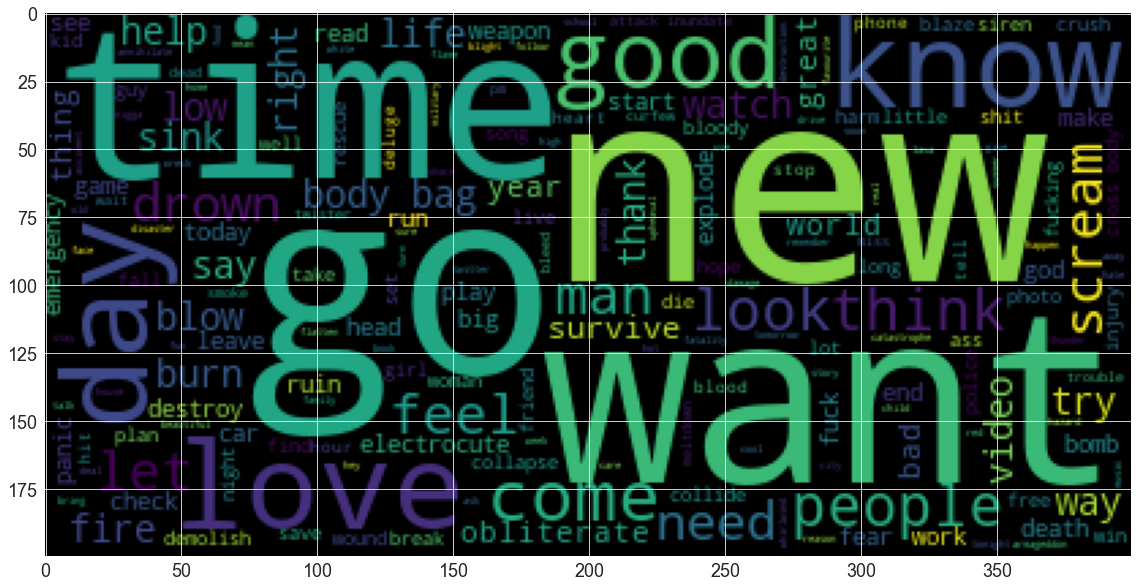

In [33]:
clean_normal_tweet_text = (data[(data['target'] == 0)]['clean_text']).tolist()

clean_normal_tweet_text_as_one_string = ' '.join(clean_normal_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(clean_normal_tweet_text_as_one_string));

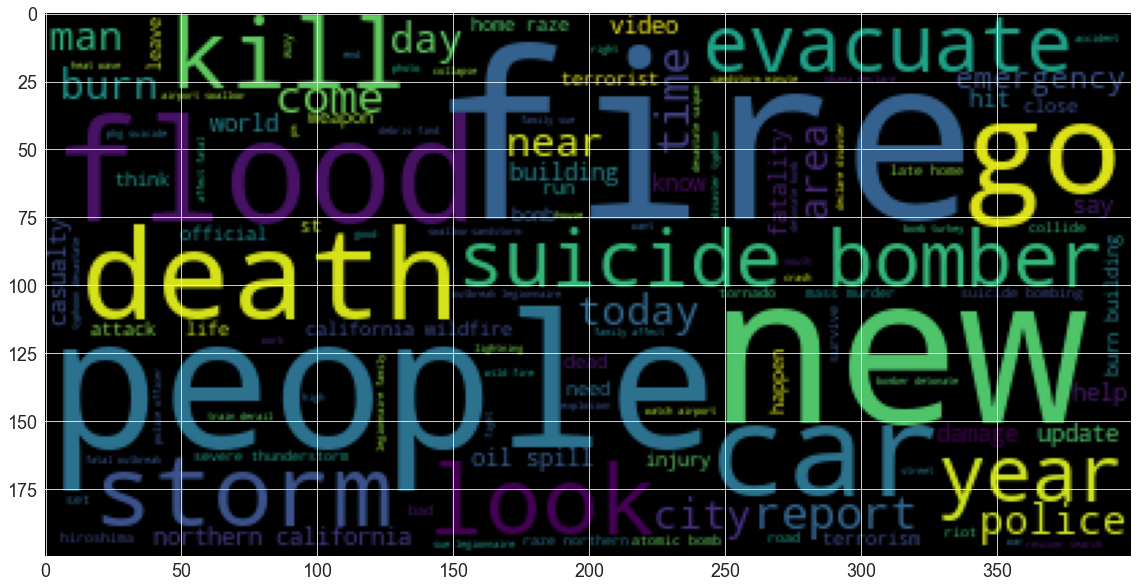

In [34]:
clean_diaster_tweet_text = (data[(data['target'] == 1)]['clean_text']).tolist()

clean_diaster_tweet_text_as_one_string = ' '.join(clean_diaster_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(clean_diaster_tweet_text_as_one_string));

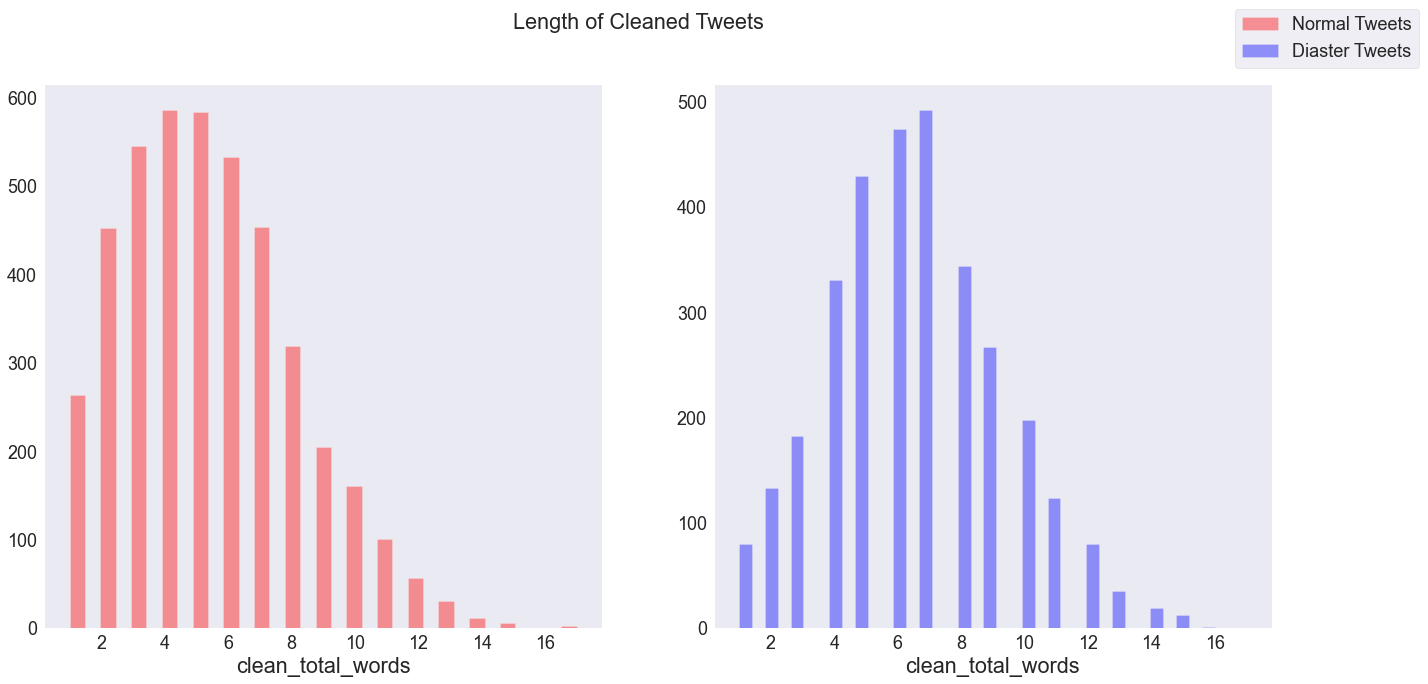

In [35]:
# Create visualization of the distribution of text length in comparision to target feature

fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)

sns.distplot(data[(data['target'] == 0)]['clean_total_words'], 
             ax = ax1, 
             kde = False, 
             color = 'red',
             label = 'Normal Tweets')

sns.distplot(data[(data['target'] == 1)]['clean_total_words'],
             ax = ax2, 
             kde = False, 
             color = 'blue',
             label = 'Diaster Tweets');

fig.suptitle('Length of Cleaned Tweets')
fig.legend(loc = 'upper right')
ax1.grid()
ax2.grid()
plt.show();

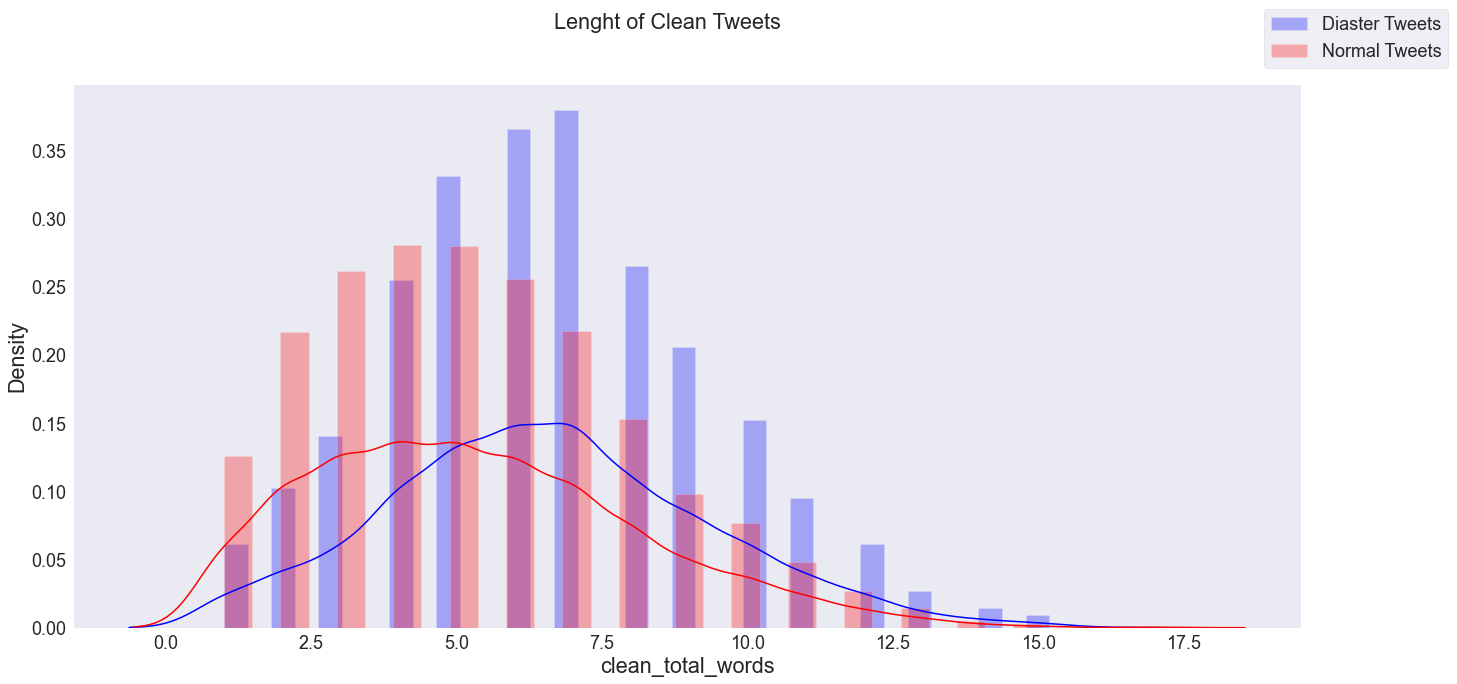

In [36]:
# Create visualization of the distribution of text length in comparision to target feature

fig, ax = plt.subplots()

sns.distplot(data[(data['target'] == 1)]['clean_total_words'],
             ax = ax, 
             kde = True, 
             color = 'blue',
             label = 'Diaster Tweets',
             hist_kws = dict(alpha = .3))

sns.distplot(data[(data['target'] == 0)]['clean_total_words'], 
             ax = ax, 
             kde = True, 
             color = 'red',
             label = 'Normal Tweets',
             hist_kws = dict(alpha = .3));

fig.suptitle('Lenght of Clean Tweets')
fig.legend(loc = 'upper right')
ax.grid()
plt.show();

In [37]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = data['clean_total_words'], 
                           name = "count", 
                           texttemplate = "%{x}", 
                           textfont_size = 20))
fig.show()

In [38]:
data.to_csv('preprocessed_clean_train_set.csv', index = False)